<a href="https://colab.research.google.com/github/lalin15rv-bit/Inteligencia-Artificial/blob/main/Multicapa/combustible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ucimlrepo        #instalamos el ucimirepo

In [3]:
from ucimlrepo import fetch_ucirepo         # importamos la uncion fetch

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)          #llama a la funcion

# data (as pandas dataframes)
X = auto_mpg.data.features              # variabes de entrada
y = auto_mpg.data.targets


In [4]:
X.head()   #Muestra las primeras cinco filas

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [5]:
y.head()     #Muestra los primeros registros pero de una columna

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [7]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [8]:
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()         #conbina los dos dataframes y el dropna elimina las ilasque tengan un valor faltante

In [9]:
df.info()      # nos da un resumen de lo que pedimos

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [10]:
X = df.drop('mpg', axis=1)        #creamos la variable X
y = df['mpg']               #crea la variable u objeto

In [11]:
from sklearn.model_selection import train_test_split        #importamos la funcion de la biblioteca

X_train, X_test, y_train, y_test = train_test_split(
    X, y,                                       #vamos a importar las variables y dividirlos en cuatro nuevos conjuntos
    test_size=0.2, random_state=1
)

In [12]:
print(X_train.shape)
print(X_test.shape)           #son las filas y columnas de los conjuntos

(313, 7)
(79, 7)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)       #usa los datos de entrenamiento para la media
X_test = scaler.transform(X_test)             #los datos se transorman usando la media y las desviaciones

In [14]:
import tensorflow as tf           #se usa para construir la red
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  #capa oculta
    Dense(32, activation='relu'),                                   #cada capa tiene sus neuronas
    Dense(16, activation='relu'),                                         #CAPA DE SALIDA
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001                 #DEFINE LA TASA DE APRENDIZAJE
adam_optimizer = Adam(learning_rate=learning_rate)

In [16]:
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',          #mide la dierencia de de los valores
    metrics=['root_mean_squared_error'],
)

In [17]:
history = model.fit(          #entrena el modelo
    X_train, y_train,
    epochs=5, batch_size=1,         #colocamos las epocas que queremos que cargue
    validation_data=(X_test, y_test)        #ayuda a sobreajustar el modelo
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 350.3627 - root_mean_squared_error: 18.4720 - val_loss: 33.1960 - val_root_mean_squared_error: 5.7616
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 19.0379 - root_mean_squared_error: 4.3475 - val_loss: 18.3691 - val_root_mean_squared_error: 4.2859
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 12.2493 - root_mean_squared_error: 3.4842 - val_loss: 13.1745 - val_root_mean_squared_error: 3.6297
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.4998 - root_mean_squared_error: 3.0618 - val_loss: 12.9452 - val_root_mean_squared_error: 3.5979
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7.6487 - root_mean_squared_error: 2.7491 - val_loss: 10.6239 - val_root_mean_squared_error: 3.2594


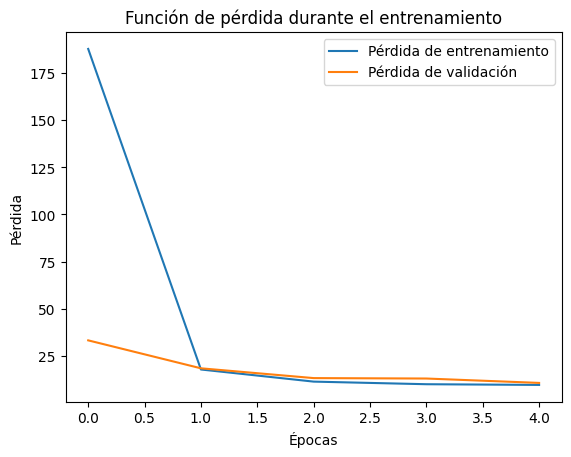

In [18]:
import matplotlib.pyplot as plt       #libreria para graficar

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')           #calcula lo perdido
plt.plot(history.history['val_loss'], label='Pérdida de validación')          #calcula lo perdido
plt.xlabel('Épocas')         #titulo del eje x
plt.ylabel('Pérdida')       #titulo del eje y
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')          #titulo de la tabla
plt.show()

In [19]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)         #calcula la perdida de la uncion
print(f'Test Mean Absolute Error: {test_mae:.2f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 11.3715 - root_mean_squared_error: 3.3699
Test Mean Absolute Error: 3.44


In [20]:
predictions = model.predict(X_test)         #usa el modelo entrenador para lo valores
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})     #asigna la prediccion del modelo
print(comparison.head())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
     Actual  Predicted
82     23.0  22.396307
167    29.0  27.196712
356    32.4  33.312477
120    19.0  17.128389
385    38.0  37.283588


In [21]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)          #calcula el coeficiente de determinacion
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)       #calcula el error
print(f'MSE: {mse}')

R²: 0.8295983893275278
MSE: 11.812627362578716
